<a href="https://colab.research.google.com/github/aakashk243/Machine_Learning_Lab/blob/main/State_Vector_Machine/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



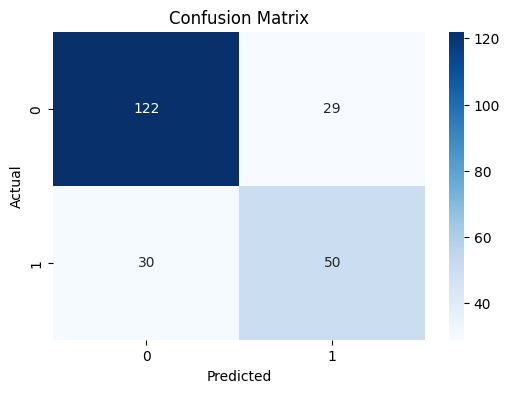

In [ ]:
# 1. Importing Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

# 2. Load Dataset from Online Link
# Replace this with any online dataset link if needed
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin',
             'bmi', 'pedigree', 'age', 'label']

data = pd.read_csv(url, header=None, names=col_names)
print("Dataset Shape:", data.shape)
display(data.head())

# 3. Split Features and Labels
X = data.drop('label', axis=1)
y = data['label']

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Train SVM Classifier
model = SVC(kernel='linear')  # You can try 'rbf', 'poly', 'sigmoid'
model.fit(X_train, y_train)

# 6. Predictions
y_pred = model.predict(X_test)

# 7. Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


1. Generate a random dataset and that follows a quadratic distribution using SVM.

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.94      0.92      0.93        52

    accuracy                           0.92        90
   macro avg       0.92      0.92      0.92        90
weighted avg       0.92      0.92      0.92        90



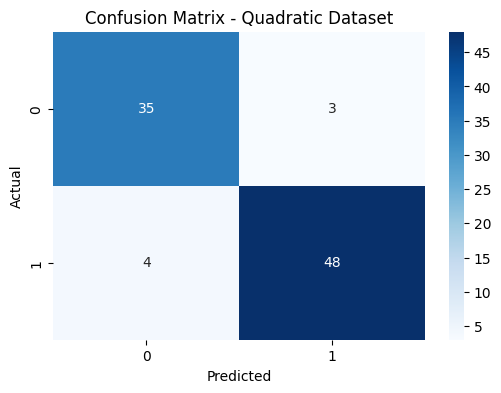

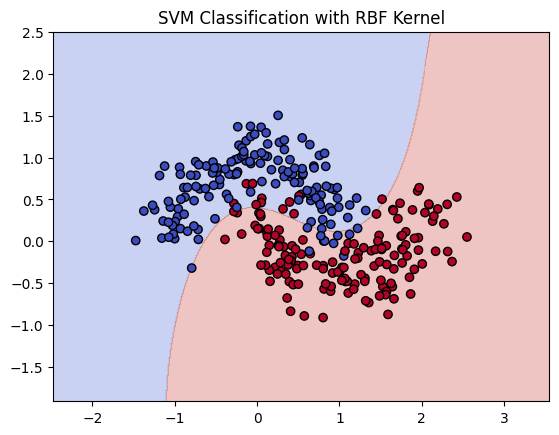

In [ ]:
# Exercise 1: Quadratic Dataset with SVM

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

# 1. Generate a non-linear (quadratic-like) dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train SVM with RBF kernel (handles quadratic/non-linear boundaries)
model = SVC(kernel='rbf', gamma='auto')
model.fit(X_train, y_train)

# 4. Predictions
y_pred = model.predict(X_test)

# 5. Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Quadratic Dataset")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\n\n")
# 6. Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 500),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("SVM Classification with RBF Kernel")
plt.show()


2. Using SVM, a company wants to classify emails as spam or not spam based on features such as word frequency
and message length.


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       120
           1       0.78      0.83      0.81        30

    accuracy                           0.92       150
   macro avg       0.87      0.89      0.88       150
weighted avg       0.92      0.92      0.92       150



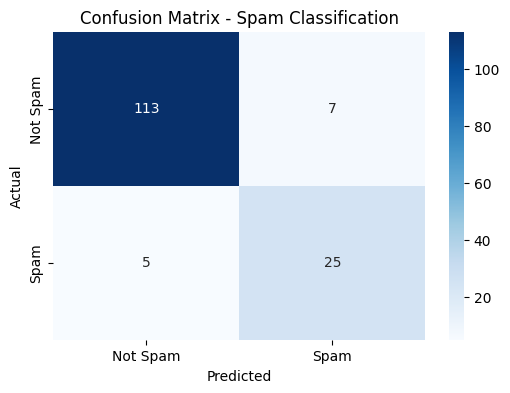

In [ ]:
# Exercise 2: Spam Classification using SVM

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

# 1. Generate synthetic spam dataset
np.random.seed(42)
n_samples = 500

# Features
word_freq = np.random.rand(n_samples) * 100  # word frequency (0-100)
msg_length = np.random.randint(20, 500, size=n_samples)  # message length

# Target (spam = 1, not spam = 0)
# Spam more likely if word frequency > 50 and msg length < 200
labels = ((word_freq > 50) & (msg_length < 200)).astype(int)
# Convert to DataFrame
data = pd.DataFrame({"word_freq": word_freq, "msg_length": msg_length, "spam": labels})

# 2. Train-Test Split
X = data[['word_freq', 'msg_length']]
y = data['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# 4. Predictions
y_pred = model.predict(X_test)

# 5. Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Not Spam","Spam"], yticklabels=["Not Spam","Spam"])
plt.title("Confusion Matrix - Spam Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
